# Sparkify Redshift DB Dashboard

This Notebook contains some visualisations of the data in the Sparkify Redshift DB after running `etl.py`, as well as some sample analytical queries. 

For further instructions on how to setup the Redshift DB, refer to the (README)[https://github.com/julianazhu/sparkify-redshift-etl/blob/master/README.md].

In [22]:
import json
import psycopg2
import boto3
import matplotlib.pyplot as plt

In [23]:
# Connect to Redshift DB with config details defined in the config file. 
# If you have not set up your Redshift cluster yet, run setup_redshift.py, 
# create_tables.py and etl.py to load the data.

CFG_FILE = 'dwh_config.json'

with open(CFG_FILE) as f:
    config = json.load(f)
    
conn = psycopg2.connect(
    "host={} dbname={} user={} password={} port={}".format(
        config['CLUSTER']['HOST'],
        config['CLUSTER']['DB_NAME'],
        config['CLUSTER']['DB_USER'],
        config['CLUSTER']['DB_PASSWORD'],
        config['CLUSTER']['DB_PORT'],
    )
)

cur = conn.cursor()

## DB Schema
The Sparkify DB is uses a star-schema design optimised on queries relating to songs played in the app.

**Fact Table:** Songplays
**Dimension Tables:** Songs, Times, Artists, Users

There are also two staging tables, `staging_events` and `staging_songs` in which the raw data from the Udacity S3 Buckets get loaded into before being transformed into the final schema.

![Sparkify DB Schema](images/sparkify_db.png)

table_counts= [105, 14896, 10025, 8023, 333, 14896, 8056]


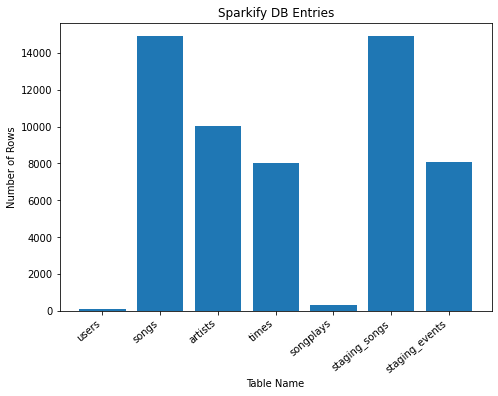

In [24]:
# Create a plot of the number of rows in each table
tables = ['users','songs','artists', 'times', 'songplays', 'staging_songs', 'staging_events']

try:
    table_counts = []
    
    for i, table in enumerate(tables):
        query = "SELECT COUNT(*) FROM " + table
        cur.execute(query)
        table_counts.append(cur.fetchone()[0])
    print("table_counts=", table_counts)
    
except Exception as e:
    print(e)

# Create the bar chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tables,table_counts)
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.xlabel('Table Name')
plt.ylabel('Number of Rows')
plt.title("Sparkify DB Entries")
plt.show()

In [19]:
query = """
SELECT
    *
FROM staging_songs
"""

try:
    cur.execute(query)
    result = cur.fetchone()
    print(result)
    
except Exception as e:
    print(e)

('ARV6GHH1187B9AED0D', 62.19845, 'SWEDEN', 17.55142, 'Sofia Talvik', 249.417, 1, 'SOBXHCE12AB018B6AC', None, 2008)


In [21]:
# Close the connection to the Redshift Cluster DB
# Remember to delete the Cluster if you aren't using it anymore using `cleanup_redshift.py`
conn.close()

In [17]:
s3 = boto3.client('s3',     
                    region_name=config['AWS']['REGION'],
                    aws_access_key_id=AWS_ACCESS_KEY,
                    aws_secret_access_key=AWS_SECRET
                    )
content_object = s3.get_object(Bucket='udacity-dend', Key='song-data/A/A/A/TRAAAAK128F9318786.json')
file_content = content_object['Body'].read().decode('utf-8')
json_content = json.loads(file_content)
print(json_content)

{'song_id': 'SOBLFFE12AF72AA5BA', 'num_songs': 1, 'title': 'Scream', 'artist_name': 'Adelitas Way', 'artist_latitude': None, 'year': 2009, 'duration': 213.9424, 'artist_id': 'ARJNIUY12298900C91', 'artist_longitude': None, 'artist_location': ''}
